In [353]:
 ANALISYS 

The rates and rides by city type are relatively reciprocal,
considering the urban areas as the highest boom, 
then the suburban ones and finally the rural areas; 
although they have a minimum percentage, it is considerable considering
the percentage of drivers they have.

It is possible that if increase the number of drivers in suburban and rural areas
increase the number of rides on those areas.
The percentage of drivers in the urban area is higher than the number of rides
and fares comparatively, however it is good to increase more drivers since it has
good scores of rides.

SyntaxError: invalid syntax (<ipython-input-353-25792d7ee60c>, line 3)

In [354]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


In [355]:
# Read the City and Ride Data

city_load_df = pd.read_csv(city_data_to_load)
ride_load_df = pd.read_csv(ride_data_to_load)

city_load_df= city_load_df.drop_duplicates('city', keep = 'first')

# Combine the data into a single dataset & Merge the first two datasets on "city" so that no data is lost 
combined_type_df = pd.merge(ride_load_df, city_load_df, how='outer',
                                 on='city')

# Display the data table for preview
combined_type_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

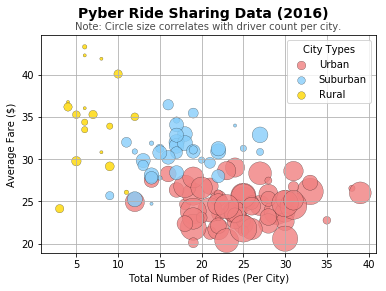

In [356]:
# Build the scatter plots for each city types
citygroup = combined_type_df.groupby("city")
avgfare = citygroup.mean()["fare"]
ridecount = citygroup["ride_id"].count()
drivercount = citygroup.max()["driver_count"]
citytype = city_load_df.set_index("city")["type"]

#Grouping totals
city_totals_df = pd.DataFrame({"Number of Rides": ridecount,
                               "Average Fare": avgfare,
                               "Driver Count": drivercount,
                               "City Type": citytype})

# Obtain the x and y coordinates for each of the three city types
urban = city_totals_df[city_totals_df["City Type"]=="Urban"]
suburban = city_totals_df[city_totals_df["City Type"]=="Suburban"]
rural = city_totals_df[city_totals_df["City Type"]=="Rural"]

# Obtain the x and y coordinates for each of the three city types
urbanridecount = urban["Number of Rides"]
urbanfares = urban ["Average Fare"]
urbandrivercount = urban["Driver Count"]
suburbanridecount = suburban["Number of Rides"]
suburbanfares= suburban["Average Fare"]
suburbandrivercount = suburban["Driver Count"]
ruralridecount = rural["Number of Rides"]
ruralfares= rural["Average Fare"]
ruraldrivercount = rural["Driver Count"]

#Colors
colorsset = {'Light Coral':'#F08080','Sky Blue':'#87CEFA','Gold':'#FED700'}
colors= {"Urban": colorset['Light Coral'], "Suburban": colorset['Sky Blue'], 
         "Rural": colorset['Gold']}

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.scatter(urbanridecount, urbanfares, s=urbandrivercount*10, color=colors["Urban"],
           edgecolor="black", label="Urban", alpha=.8, linewidths=.25)
plt.scatter(suburbanridecount, suburbanfares, s=suburbandrivercount*10, color=colors["Suburban"],
           edgecolor="black", label="Suburban", alpha=.8, linewidths=.25)
plt.scatter(ruralridecount, ruralfares, s=ruraldrivercount*10, color=colors["Rural"],
           edgecolor="black", label="Rural", alpha=.8, linewidths=.25)


# Create a legend
plt.suptitle("Pyber Ride Sharing Data (2016)", fontsize=14, fontweight='bold')

# Incorporate a text label regarding circle size
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

#Legend
lgnd= plt.legend(title="City Types")
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[60]
lgnd.legendHandles[2]._sizes=[60]

plt.title("Note: Circle size correlates with driver count per city.", alpha = 0.70, fontsize=10)

#Save figure
plt.savefig("Pyber_Ride_Sharing.png")

# Show plot
plt.show()


## Total Fares by City Type

{'Urban': '#F08080', 'Suburban': '#87CEFA', 'Rural': '#FED700'}


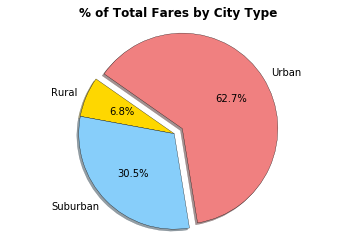

In [357]:
# Calculate Type Percents

by_type = combined_type_df.groupby("type")["type", "fare", "ride_id", "driver_count"]
fare_sum = by_type.sum()['fare']
labels = fare_sum.index
print(colors)
colors = (colors[n] for n in labels)
explode = [0, 0, 0.1]


# Build Pie Chart
plt.pie(fare_sum, startangle=145, colors = [ '#FED700','#87CEFA', '#F08080'], 
        explode = explode, 
        labels = labels, autopct = "%1.1f%%", shadow = True,
        wedgeprops = {'linewidth':.3, 'edgecolor':'black'})
        
  
        
plt.title('% of Total Fares by City Type',  fontsize=12, fontweight='black')
plt.axis('equal')

# Save Figure
plt.savefig("Fares_by_city.png")

# Show Figure
plt.show()



In [358]:
# Show Figure
plt.show()

## Total Rides by City Type

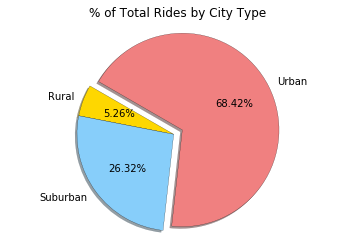

In [359]:
# Calculate Ride Percents
ride_total= by_type.count()['ride_id']
labels = ride_total.index

# Build Pie Chart
plt.pie(ride_total, startangle = 150, explode = explode, 
         colors = ['#FED700','#87CEFA', '#F08080'],
        labels = labels, autopct = '%0.2f%%',
        shadow = True, wedgeprops = {'linewidth': .2, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')

# Save Figure
plt.savefig("Total_rides_city.png")

# Show Figure
plt.show()

In [360]:
# Show Figure
plt.show()

## Total Drivers by City Type

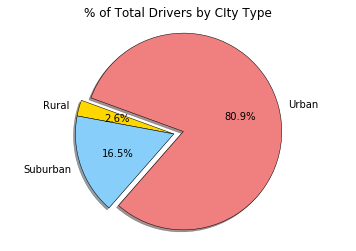

In [363]:
# Calculate Driver Percents

drivers_total= city_load_df.groupby('type').sum()["driver_count"]
labels = drivers_total.index

# Build Pie Charts

plt.pie(drivers_total, startangle=160, explode = explode, 
        colors = ['#FED700','#87CEFA', '#F08080'], labels = labels, 
        autopct = "%1.1f%%", shadow = True, 
        wedgeprops = {'linewidth':.5, 'edgecolor': 'black'})

plt.title('% of Total Drivers by CIty Type')
plt.axis('equal')

# Save Figure
plt.savefig("Total_Drivers_City_Type.png")


In [364]:
# Show Figure
plt.show()